#K Means Clustering Algorithms Implementation

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.datasets import make_blobs
X,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)

In [ ]:
X.shape

(1000, 2)

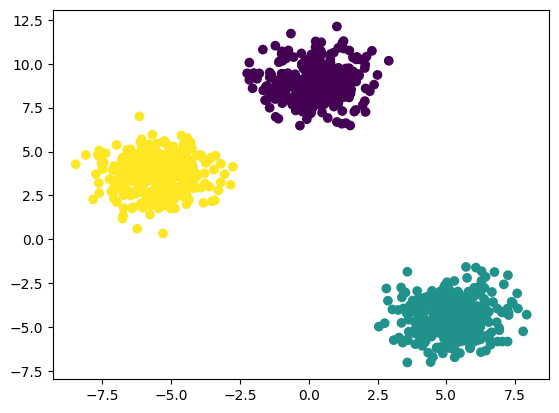

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(750, 2) (750,)
(250, 2) (250,)


In [ ]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

#Manual Process
#Elbow Method to select the  K Value

WCSS=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,init='k-means++')
  kmeans.fit(X_train)
  WCSS.append(kmeans.inertia_)


In [ ]:
WCSS

[38942.19694117094,
 8820.694152589957,
 1475.4321389025872,
 1270.9907010043999,
 1097.8281611952707,
 951.9605910933415,
 846.0673642492516,
 739.1447063805206,
 645.2536899141505,
 591.7974234332057]

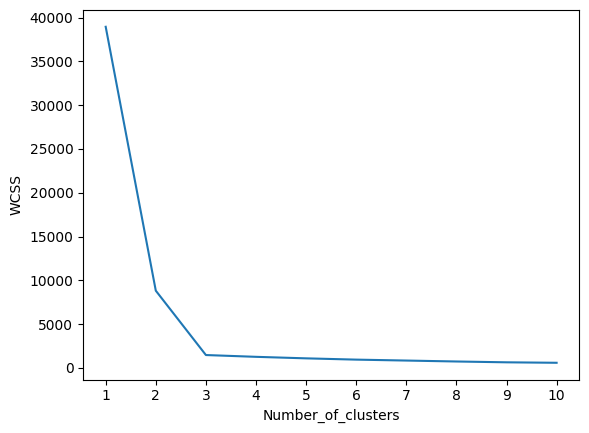

In [ ]:
#plot elbow graph
plt.plot(range(1,11),WCSS)
plt.xticks(range(1,11))
plt.xlabel("Number_of_clusters")
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=3,init='k-means++')

In [ ]:
kmeans.fit(X_train)

KMeans(n_clusters=3)

In [ ]:
y_labels=kmeans.predict(X_train)


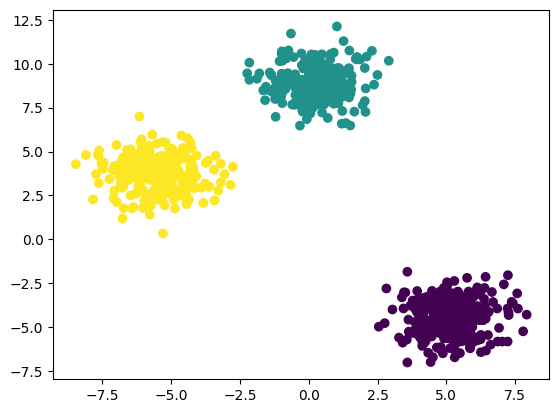

In [ ]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

In [ ]:
y_test_labels=kmeans.predict(X_test)

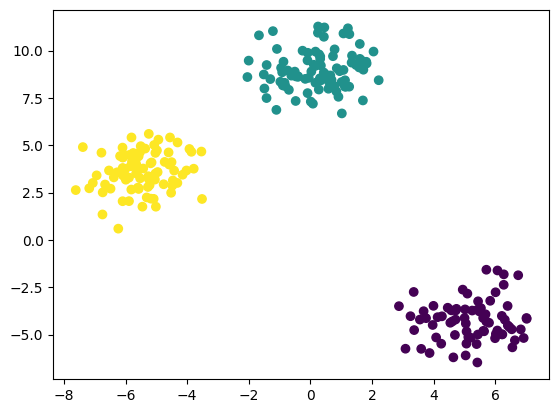

In [ ]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_labels)

In [ ]:
#knee_locator
!pip install kneed

In [ ]:
from kneed import KneeLocator

kl = KneeLocator(range(1, 11),WCSS, curve='convex', direction='decreasing')
kl.elbow

3

In [ ]:
#Performance metrics
#Silhoutte score

from sklearn.metrics import silhouette_score

silhouette_coeffient=[]
for k in range(2,11):
   kmeans=KMeans(n_clusters=k,init='k-means++')
   kmeans.fit(X_train)
   score=silhouette_score(X_train,kmeans.labels_)
   silhouette_coeffient.append(score)

In [ ]:
silhouette_coeffient

[0.7285220879328288,
 0.8070976381014228,
 0.6349275684861594,
 0.47748638255704506,
 0.3373327082172459,
 0.3437240701689127,
 0.3412943499295789,
 0.3481925004915967,
 0.3423704348046785]

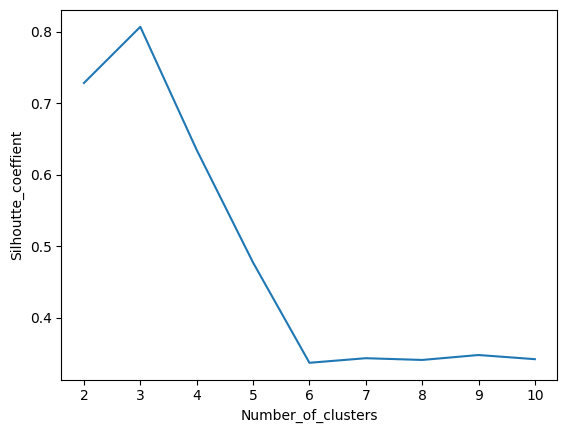

In [ ]:
#plot sihouette_score graph
plt.plot(range(2,11),silhouette_coeffient)
plt.xticks(range(2,11))
plt.xlabel("Number_of_clusters")
plt.ylabel('Silhoutte_coeffient')
plt.show()



#Insights:
for k =3 seilhouette_score is highest